In [1]:
#!pip install ipywidgets

In [15]:
import pandas as pd
import urllib.parse
import matplotlib.pyplot as plt
import numpy as np
import ffkkmo_ra
import ipywidgets as widgets

Получим датасет

In [16]:
df = pd.read_csv("ffkkmo_clean.csv", index_col='Unnamed: 0')

In [17]:
clubs = sorted(list(filter(lambda x : isinstance(x, str), df.club.unique())))
categoies = df.category.unique()
club = widgets.Dropdown(
    options=clubs,
    value=clubs[0],
    description='Школа:',
    disabled=False,
)
category = widgets.Dropdown(
    options=categoies,
    value=categoies[0],
    description='Разряд:',
    disabled=False,
)
limit_val = widgets.IntSlider(
    value=50,
    min=0,
    max=200,
    step=1,
    description='Количество:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)
season = widgets.Dropdown(
    options=[2021, 2122, 2223, 2324, 2425],
    value=2425,
    description='Сезон:',
    disabled=False,
)

In [18]:
display(club)
display(category)
display(season)
display(limit_val)

Dropdown(description='Школа:', options=('Балашиха, АНО ДЮСШ «Олимп»', 'Балашиха, МАУ ДО «СШОР им. Ю.Е. Ляпкина…

Dropdown(description='Разряд:', options=('3-й юношеский разряд, мальчики', '3-й юношеский разряд, девочки', '2…

Dropdown(description='Сезон:', index=4, options=(2021, 2122, 2223, 2324, 2425), value=2425)

IntSlider(value=50, continuous_update=False, description='Количество:', max=200)

In [20]:
ffkkmo_ra.get_top_df(df, 5)

Балашиха, МАУ ДО «СШОР им. Ю.Е. Ляпкина»                    2495
Щелково, МАУ ГОЩ «ФОК «Ледовая арена» им. В.А. Третьяка     1931
Одинцово, МБУ ДО СШ «Одинцово»                              1910
Лыткарино, МАУ «ЛСК Лыткарино»                              1831
Наро-Фоминский, МАУ ДО ЦСШ №1                               1634
Остальные                                                  19607
Name: club, dtype: int64

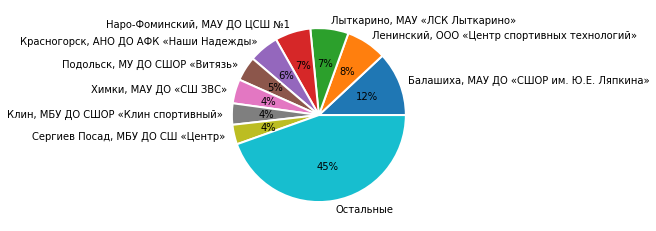

In [21]:
ffkkmo_ra.pie_of_winners(df, 2425, 3, 9, "Доля призеров в сезоне 24-25")
plt.title("", fontsize=16)
plt.xlabel("", fontsize=18)
plt.ylabel("", fontsize=18);

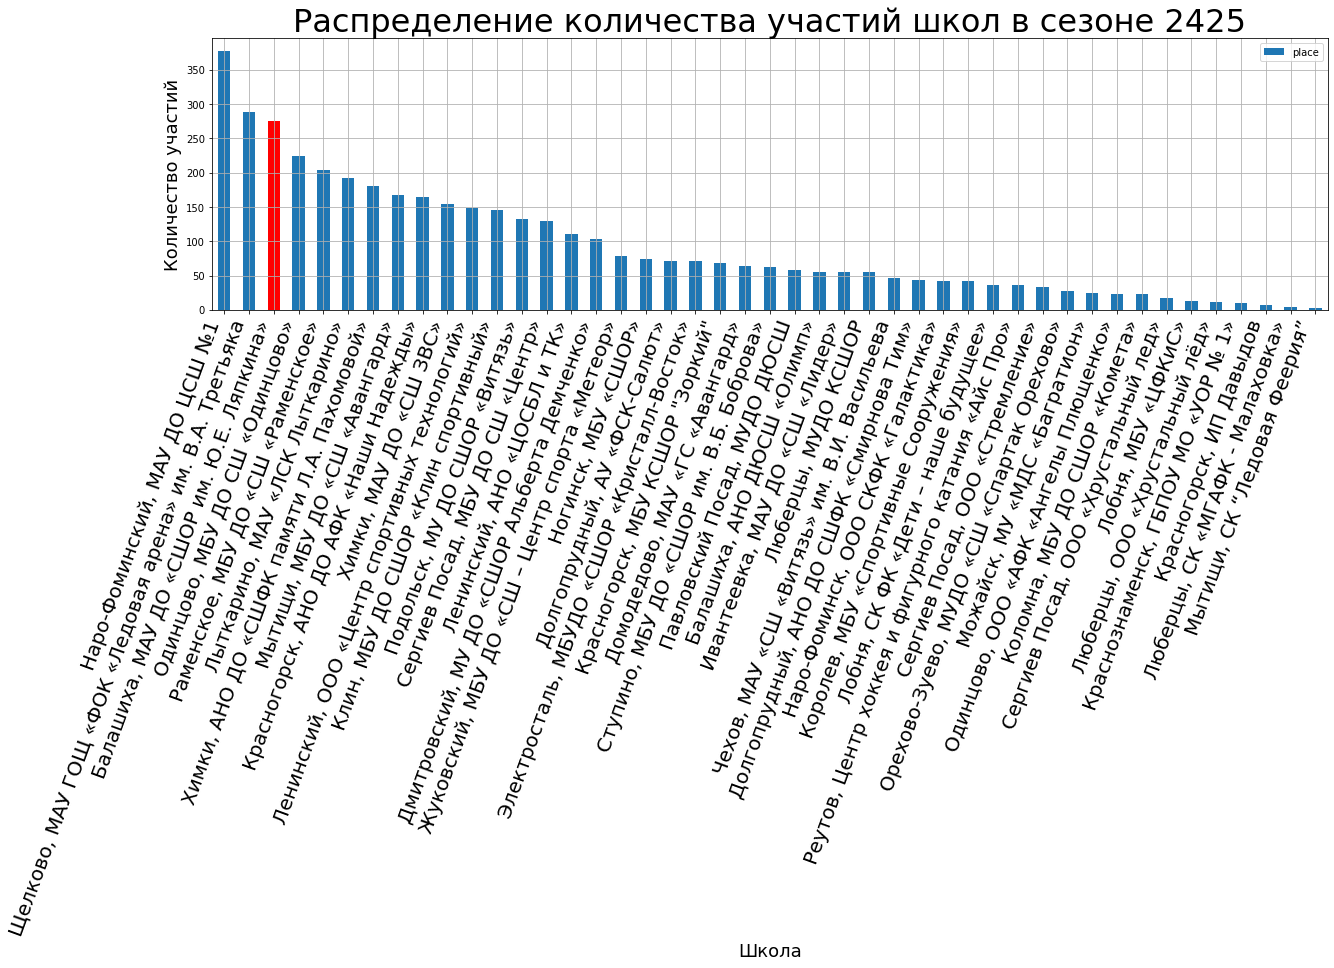

In [22]:
ffkkmo_ra.plot_clubs_in_season(df, season.value, limit_val.value, club.value)

In [23]:
ffkkmo_ra.get_df_of_club_in_season(df, club.value, season.value)

,date,place,online,category,segment,rank,firstname,middlename,lastname,club,tss,tes,pcs,year,month,season
0,2024-09-14,"г. Клин, ул. Карла Маркса, д. 99, Ледовый двор...",http://ffkkmo.ru/events/2425/klin09/,"2-й спортивный разряд, девочки",Короткая программа,2,Елизавета,NaN,ЧЕРЕПАНОВА,"Балашиха, МАУ ДО «СШОР им. Ю.Е. Ляпкина»",29.22,16.25,13.47,2024,9,2425
1,2024-09-14,"г. Клин, ул. Карла Маркса, д. 99, Ледовый двор...",http://ffkkmo.ru/events/2425/klin09/,"2-й спортивный разряд, девочки",Короткая программа,3,Милана,NaN,МОСЯГИНА,"Балашиха, МАУ ДО «СШОР им. Ю.Е. Ляпкина»",25.43,11.83,14.10,2024,9,2425
2,2024-09-14,"г. Клин, ул. Карла Маркса, д. 99, Ледовый двор...",http://ffkkmo.ru/events/2425/klin09/,"2-й спортивный разряд, девочки",Произвольная программа,1,Милана,NaN,МОСЯГИНА,"Балашиха, МАУ ДО «СШОР им. Ю.Е. Ляпкина»",61.14,30.98,30.66,2024,9,2425
3,2024-09-14,"г. Клин, ул. Карла Маркса, д. 99, Ледовый двор...",http://ffkkmo.ru/events/2425/klin09/,"2-й спортивный разряд, девочки",Произвольная программа,2,Елизавета,NaN,ЧЕРЕПАНОВА,"Балашиха, МАУ ДО «СШОР им. Ю.Е. Ляпкина»",58.04,29.20,28.84,2024,9,2425
4,2024-09-14,"г. Клин, ул. Карла Маркса, д. 99, Ледовый двор...",http://ffkkmo.ru/events/2425/klin09/,"1-й спортивный разряд, девочки",Короткая программа,1,Елизавета,NaN,ШИРЯЕВА,"Балашиха, МАУ ДО «СШОР им. Ю.Е. Ляпкина»",59.12,33.37,25.75,2024,9,2425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402,2025-05-24,"г. Электросталь, ул. Радио, д. 3, ЛДС ""Кристалл""",http://ffkkmo.ru/events/2425/el05/,"3-й спортивный разряд, девочки",Произвольная программа,6,Арина,Андреевна,ЕРЫГИНА,"Балашиха, МАУ ДО «СШОР им. Ю.Е. Ляпкина»",35.56,16.91,21.15,2025,5,2425
403,2025-05-24,"г. Электросталь, ул. Радио, д. 3, ЛДС ""Кристалл""",http://ffkkmo.ru/events/2425/el05/,"2-й спортивный разряд, девочки",Короткая программа,7,Алена,Алексеевна,КРУПИНА,"Балашиха, МАУ ДО «СШОР им. Ю.Е. Ляпкина»",28.75,14.04,14.71,2025,5,2425
404,2025-05-24,"г. Электросталь, ул. Радио, д. 3, ЛДС ""Кристалл""",http://ffkkmo.ru/events/2425/el05/,"2-й спортивный разряд, девочки",Произвольная программа,5,Алена,Алексеевна,КРУПИНА,"Балашиха, МАУ ДО «СШОР им. Ю.Е. Ляпкина»",53.29,24.29,29.00,2025,5,2425
405,2025-05-24,"г. Электросталь, ул. Радио, д. 3, ЛДС ""Кристалл""",http://ffkkmo.ru/events/2425/el05/,"Юный фигурист, девочки",Произвольная программа,3,Лусинэ,Сергеевна,ТЕПОЯН,"Балашиха, МАУ ДО «СШОР им. Ю.Е. Ляпкина»",11.75,5.75,6.00,2025,5,2425


In [25]:
# ffkkmo_ra.sportsmen_rating_in_season(df, season.value, category.value, 'Мария', 'ТУЛАЕВА', limit=limit_val.value)

,date,firstname,lastname,club,rank,tss,tes,pcs,year,month,season,label


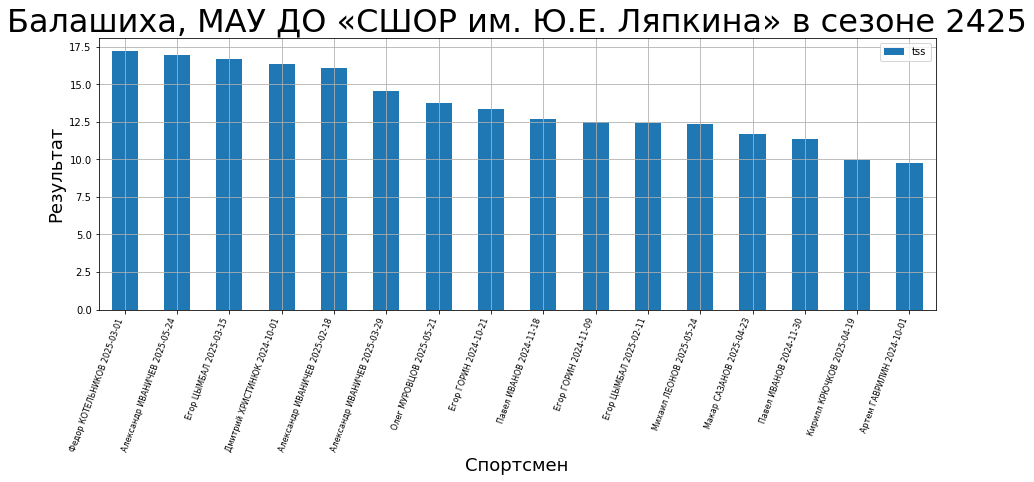

In [26]:
ffkkmo_ra.club_rating_in_season(df, season.value, category.value, club.value, limit=limit_val.value)

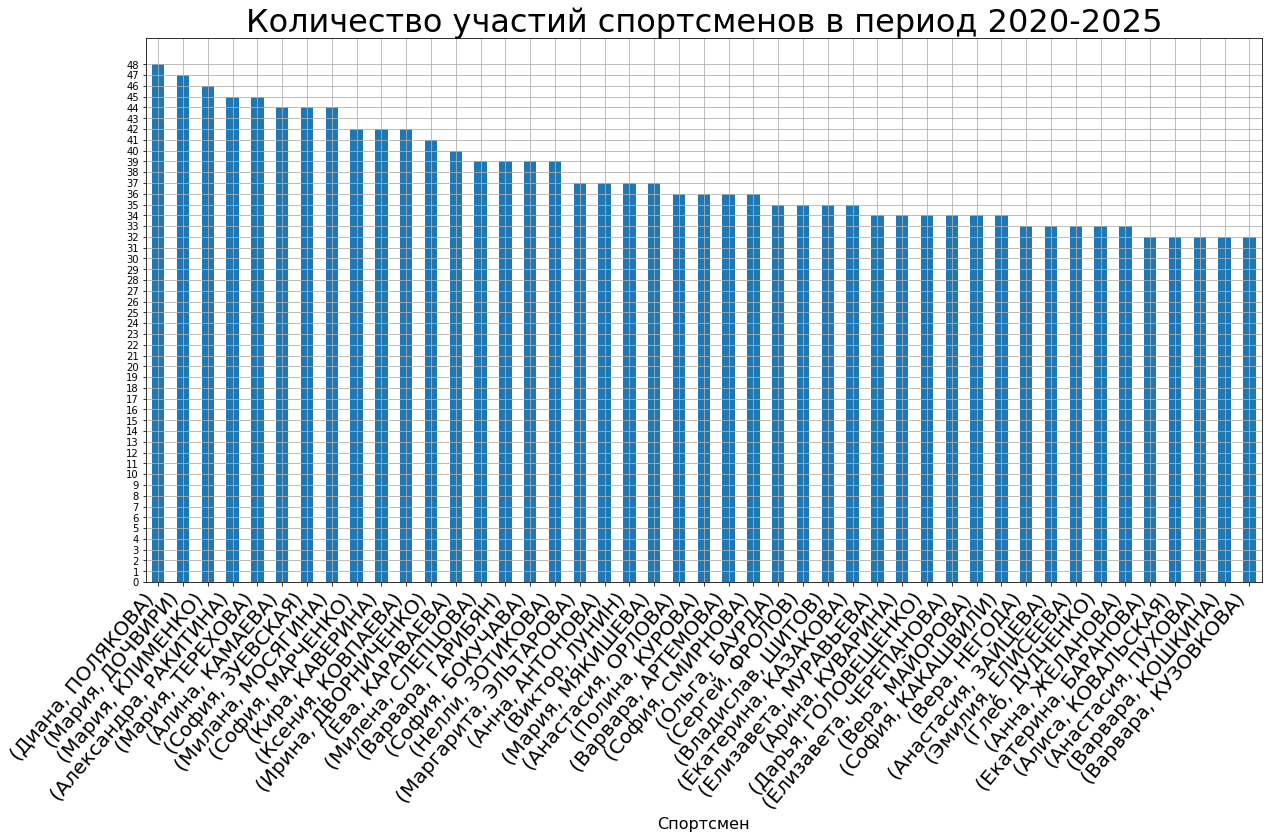

In [27]:
data = df[df['segment']=='Произвольная программа'].groupby(['firstname', 'lastname']).count().sort_values(
    by='date', ascending=False).head(45)['date']
ax = data.plot(
    kind='bar', figsize=(20, 10), grid=True
)
major_ticks = np.arange(0, max(data) + 1, 1)
ax.set_yticks(major_ticks)
plt.title("Количество участий спортсменов в период 2020-2025", fontsize=32)
plt.xlabel('Спортсмен', fontsize=16)
plt.ylabel(f'', fontsize=18)
plt.xticks(fontsize=20, rotation=50, horizontalalignment='right');

In [29]:
df[df['category'].isin(categoies)&(df['season']==2425)].sort_values(by="tss").groupby(["category", "segment"]).last()[['club', 'date', 'firstname', 'lastname', 'tss', 'tes', 'pcs']]

club  \
category                        segment                                                                 
1-й спортивный разряд, девочки  Короткая программа           Балашиха, МАУ ДО «СШОР им. Ю.Е. Ляпкина»   
                                Произвольная программа   Ленинский, ООО «Центр спортивных технологий»   
1-й спортивный разряд, мальчики Короткая программа                    Сергиев Посад, ООО «Стремление»   
                                Произвольная программа                Сергиев Посад, ООО «Стремление»   
1-й юношеский разряд, девочки   Произвольная программа        Ступино, МБУ ДО «СШОР им. В.Б. Боброва»   
1-й юношеский разряд, мальчики  Произвольная программа                Сергиев Посад, ООО «Стремление»   
2-й спортивный разряд, девочки  Короткая программа       Ленинский, ООО «Центр спортивных технологий»   
                                Произвольная программа           Одинцово, ООО «АФК «Ангелы Плющенко»   
2-й спортивный разряд, мальчики Короткая программа                  Раменское, МБУ ДО «СШ «Раменское»   
                                Произвольная программа                 Лыткарино, МАУ «ЛСК Лыткарино»   
2-й юношеский разряд, девочки   Произвольная программа                  Мытищи, МБУ ДО «СШ «Авангард»   
2-й юношеский разряд, мальчики  Произвольная программа       Долгопрудный, АНО ДО СШФК «Смирнова Тим»   
3-й спортивный разряд, девочки  Произвольная программа                  Подольск, МУ ДО СШОР «Витязь»   
3-й спортивный разряд, мальчики Произвольная программа                            Люберцы, МУДО КСШОР   
3-й юношеский разряд, девочки   Произвольная программа         Красногорск, АНО ДО АФК «Наши Надежды»   
3-й юношеский разряд, мальчики  Произвольная программа       Долгопрудный, АНО ДО СШФК «Смирнова Тим»   
КМС, юноши                      Короткая программа               Одинцово, ООО «АФК «Ангелы Плющенко»   
                                Произвольная программа           Одинцово, ООО «АФК «Ангелы Плющенко»   
МС юноши                        Короткая программа               Одинцово, ООО «АФК «Ангелы Плющенко»   
                                Произвольная программа           Одинцово, ООО «АФК «Ангелы Плющенко»   
МС, девушки                     Короткая программа       Ленинский, ООО «Центр спортивных технологий»   
                                Произвольная программа           Одинцово, ООО «АФК «Ангелы Плющенко»   
Младшая группа, девочки         Короткая программа       Ленинский, ООО «Центр спортивных технологий»   
                                Произвольная программа   Ленинский, ООО «Центр спортивных технологий»   
Младшая группа, мальчики        Короткая программа                     Одинцово, МБУ ДО СШ «Одинцово»   
                                Произвольная программа              Раменское, МБУ ДО «СШ «Раменское»   
Старшая группа, девочки         Короткая программа       Ленинский, ООО «Центр спортивных технологий»   
                                Произвольная программа   Ленинский, ООО «Центр спортивных технологий»   
Старшая группа, мальчики        Короткая программа                    Сергиев Посад, ООО «Стремление»   
                                Произвольная программа                Сергиев Посад, ООО «Стремление»   
Юный фигурист, девочки          Катание под музыку                     Лыткарино, МАУ «ЛСК Лыткарино»   
                                Произвольная программа  Жуковский, МБУ ДО «СШ – Центр спорта «Метеор»   
Юный фигурист, мальчики         Катание под музыку                     Лыткарино, МАУ «ЛСК Лыткарино»   
                                Произвольная программа              Раменское, МБУ ДО «СШ «Раменское»   

                                                              date  firstname  \
category                        segment                                         
1-й спортивный разряд, девочки  Короткая программа      2024-09-14  Елизавета   
                                Произвольная программа  2025-03-29     Ан

In [30]:
df[(df['season']==2425)].groupby("category").count()['date']

category
1-й спортивный разряд, девочки      880
1-й спортивный разряд, мальчики      72
1-й юношеский разряд, девочки       429
1-й юношеский разряд, мальчики       27
2-й спортивный разряд, девочки     1270
2-й спортивный разряд, мальчики      44
2-й юношеский разряд, девочки       810
2-й юношеский разряд, мальчики       69
3-й спортивный разряд, девочки      701
3-й спортивный разряд, мальчики      56
3-й юношеский разряд, девочки       586
3-й юношеский разряд, мальчики       16
КМС, юноши                           30
МС юноши                             12
МС, девушки                         108
Младшая группа, девочки              59
Младшая группа, мальчики             10
Старшая группа, девочки              60
Старшая группа, мальчики              8
Юный фигурист, девочки              173
Юный фигурист, мальчики              15
Name: date, dtype: int64

In [37]:

df_groupped

,date,firstname,lastname,club,place,online,category,segment,rank,middlename,tss,tes,pcs,year,month,season
0,2020-09-27,Аврора,БАГИНА,"Щелково, МАУ ГОЩ «ФОК «Ледовая арена» им. В.А....","г. Лыткарино, ул. Советская д.9а, ЛСК «Лыткарино»",http://ffkkmo.ru/events/2021/lytkarino0927/,"3-й юношеский разряд, девочки",Произвольная программа,22,None,11.17,3.54,7.63,2020,9,2021
1,2020-09-27,Аксинья,КРУПИНА,"Щелково, МАУ ГОЩ «ФОК «Ледовая арена» им. В.А....","г. Лыткарино, ул. Советская д.9а, ЛСК «Лыткарино»",http://ffkkmo.ru/events/2021/lytkarino0927/,"1-й юношеский разряд, девочки",Произвольная программа,5,None,30.56,13.46,17.10,2020,9,2021
2,2020-09-27,Александра,ЕФИМОВА,"Балашиха, МАУ ДО «СШОР им. Ю.Е. Ляпкина»","г. Лыткарино, ул. Советская д.9а, ЛСК «Лыткарино»",http://ffkkmo.ru/events/2021/lytkarino0927/,"2-й юношеский разряд, девочки",Произвольная программа,15,None,23.43,8.90,14.53,2020,9,2021
3,2020-09-27,Александра,МОНАХОВА,"Балашиха, МАУ ДО «СШОР им. Ю.Е. Ляпкина»","г. Лыткарино, ул. Советская д.9а, ЛСК «Лыткарино»",http://ffkkmo.ru/events/2021/lytkarino0927/,"1-й юношеский разряд, девочки",Произвольная программа,15,None,26.51,9.55,16.96,2020,9,2021
4,2020-09-27,Александра,ШОШНИКОВА,"Сергиев Посад, МБУ ДО СШ «Центр»","г. Лыткарино, ул. Советская д.9а, ЛСК «Лыткарино»",http://ffkkmo.ru/events/2021/lytkarino0927/,"2-й юношеский разряд, девочки",Произвольная программа,5,None,26.49,11.92,15.07,2020,9,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23582,2025-05-24,Ульяна,СКВОЛЫГИНА,"Лыткарино, МАУ «ЛСК Лыткарино»","г. Электросталь, ул. Радио, д. 3, ЛДС ""Кристалл""",http://ffkkmo.ru/events/2425/el05/,"2-й спортивный разряд, девочки",Произвольная программа,22,Андреевна,45.87,21.55,24.82,2025,5,2425
23583,2025-05-24,Ульяна,ЩЕРБАКОВА,"Павловский Посад, МУДО ДЮСШ","г. Электросталь, ул. Радио, д. 3, ЛДС ""Кристалл""",http://ffkkmo.ru/events/2425/el05/,"3-й юношеский разряд, девочки",Произвольная программа,3,Максимовна,15.07,6.31,8.76,2025,5,2425
23584,2025-05-24,Элиза,ЗАКАРЯН,"Ленинский, ООО «Центр спортивных технологий»","г. Электросталь, ул. Радио, д. 3, ЛДС ""Кристалл""",http://ffkkmo.ru/events/2425/el05/,"2-й спортивный разряд, девочки",Произвольная программа,3,Эмилевна,55.25,25.93,29.82,2025,5,2425
23585,2025-05-24,Ярослава,СПЕШНЕВА,"Долгопрудный, АУ «ФСК-Салют»","г. Электросталь, ул. Радио, д. 3, ЛДС ""Кристалл""",http://ffkkmo.ru/events/2425/el05/,"3-й спортивный разряд, девочки",Произвольная программа,13,Георгиевна,32.53,15.79,17.24,2025,5,2425


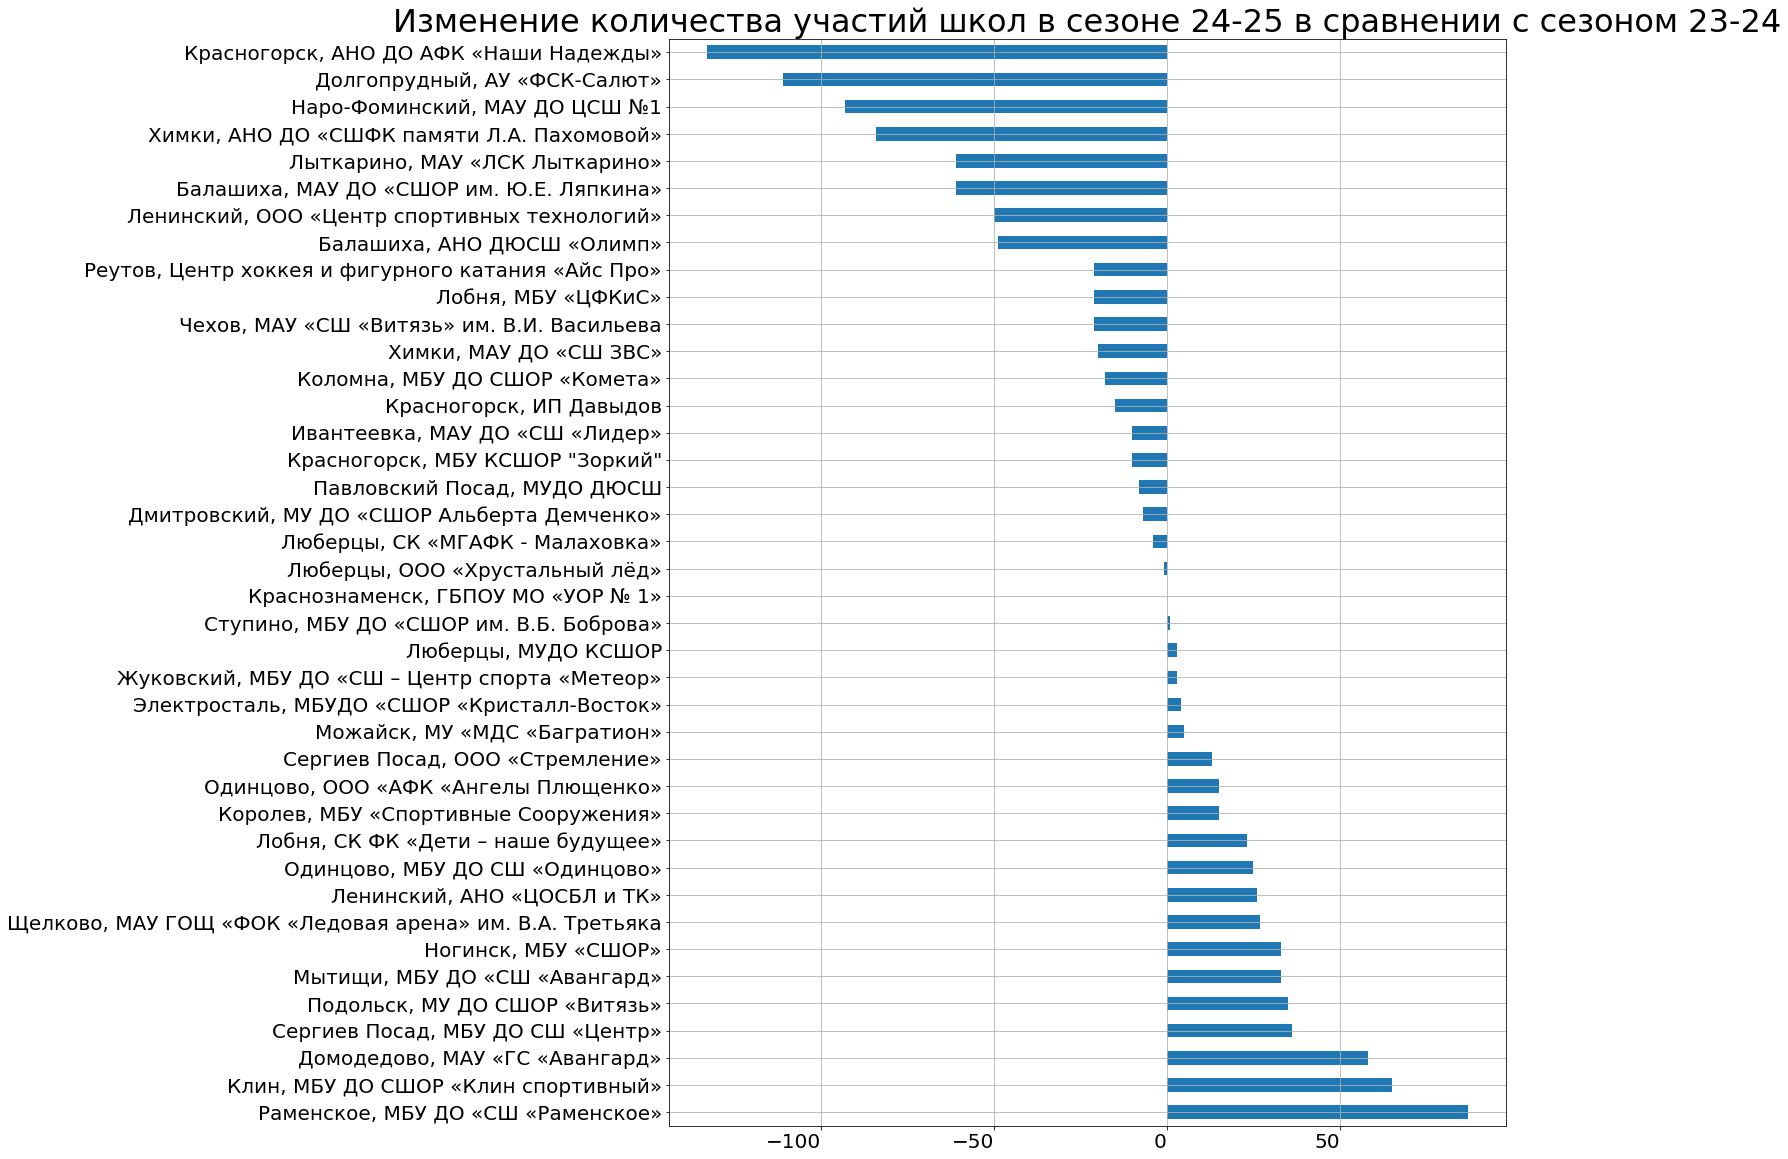

In [38]:
df_groupped = df.groupby(["date", "firstname", "lastname", "club"]).last().reset_index()
pivot_df = pd.pivot_table(df_groupped, values='date', index='club', columns='season', aggfunc='count')
tdf = pivot_df[2425] - pivot_df[2324]
tdf = tdf.dropna()
tdf.sort_values(ascending=False).plot(
    kind='barh', figsize=(15, 20), grid=True
)
plt.title("Изменение количества участий школ в сезоне 24-25 в сравнении с сезоном 23-24", fontsize=32)
plt.ylabel(f'', fontsize=18)
plt.yticks(fontsize=20, rotation=0, horizontalalignment='right');
plt.xticks(fontsize=20, rotation=0, horizontalalignment='right');

In [52]:
pd.set_option('display.max_rows', 100)
display(pivot_df)

season,2021,2122,2223,2324,2425
club,,,,,
"Балашиха, АНО ДЮСШ «Олимп»",30.0,89.0,66.0,105.0,56.0
"Балашиха, МАУ ДО «СШОР им. Ю.Е. Ляпкина»",407.0,482.0,347.0,336.0,275.0
"Балашиха, СКФК «Голден Стар»",17.0,NaN,NaN,NaN,NaN
"Дмитровский, ИП Карпенко",NaN,14.0,27.0,23.0,NaN
"Дмитровский, МУ ДО «СШОР Альберта Демченко»",118.0,177.0,136.0,111.0,104.0
"Долгопрудный, АНО ДО СШФК «Смирнова Тим»",NaN,NaN,NaN,NaN,44.0
"Долгопрудный, АУ «ФСК-Салют»",184.0,233.0,226.0,182.0,71.0
"Долгопрудный, СК «Альфа»",43.0,NaN,NaN,NaN,NaN
"Домодедово, ИП Спицин",87.0,58.0,49.0,4.0,NaN


In [25]:
pivot_df = pd.pivot_table(df, values='lastname', index='club', columns='season', aggfunc=lambda x: len(x.unique()))
pivot_df

season,2021,2122,2223,2324,2425
club,,,,,
"Балашиха, АНО ДЮСШ «Олимп»",13.0,26.0,22.0,27.0,22.0
"Балашиха, МАУ ДО «СШОР им. Ю.Е. Ляпкина»",83.0,76.0,70.0,73.0,66.0
"Балашиха, СКФК «Голден Стар»",9.0,NaN,NaN,NaN,NaN
"Дмитровский, ИП Карпенко",NaN,8.0,7.0,6.0,NaN
"Дмитровский, МУ ДО «СШОР Альберта Демченко»",30.0,34.0,29.0,23.0,22.0
...,...,...,...,...,...
"Щелково, МАУ ГОЩ «ФОК «Ледовая арена» им. В.А. Третьяка",57.0,53.0,52.0,56.0,45.0
"Электросталь, ИП Мартынова",NaN,9.0,NaN,NaN,NaN
"Электросталь, МБУДО «СШОР «Кристалл-Восток»",12.0,13.0,20.0,16.0,15.0


In [26]:
def sportsmens_qty_trend(season_prev, season_next, plot=True):
    pivot_df = pd.pivot_table(df, values='lastname', index='club', columns='season', aggfunc=lambda x: len(x.unique()))
    tdf = pivot_df[season_next] - pivot_df[season_prev]
    tdf = tdf.dropna()
    tdf = tdf.sort_values(ascending=False)
    if plot:
        tdf.plot(
            kind='barh', figsize=(15, 20), grid=True
        )
        plt.title("Изменение количества участий спортсменов в сезоне 24-25 в сравнении с сезоном 23-24", fontsize=32)
        plt.ylabel(f'', fontsize=18)
        plt.yticks(fontsize=20, rotation=0, horizontalalignment='right');
        plt.xticks(fontsize=20, rotation=0, horizontalalignment='right');
    else:
        return tdf

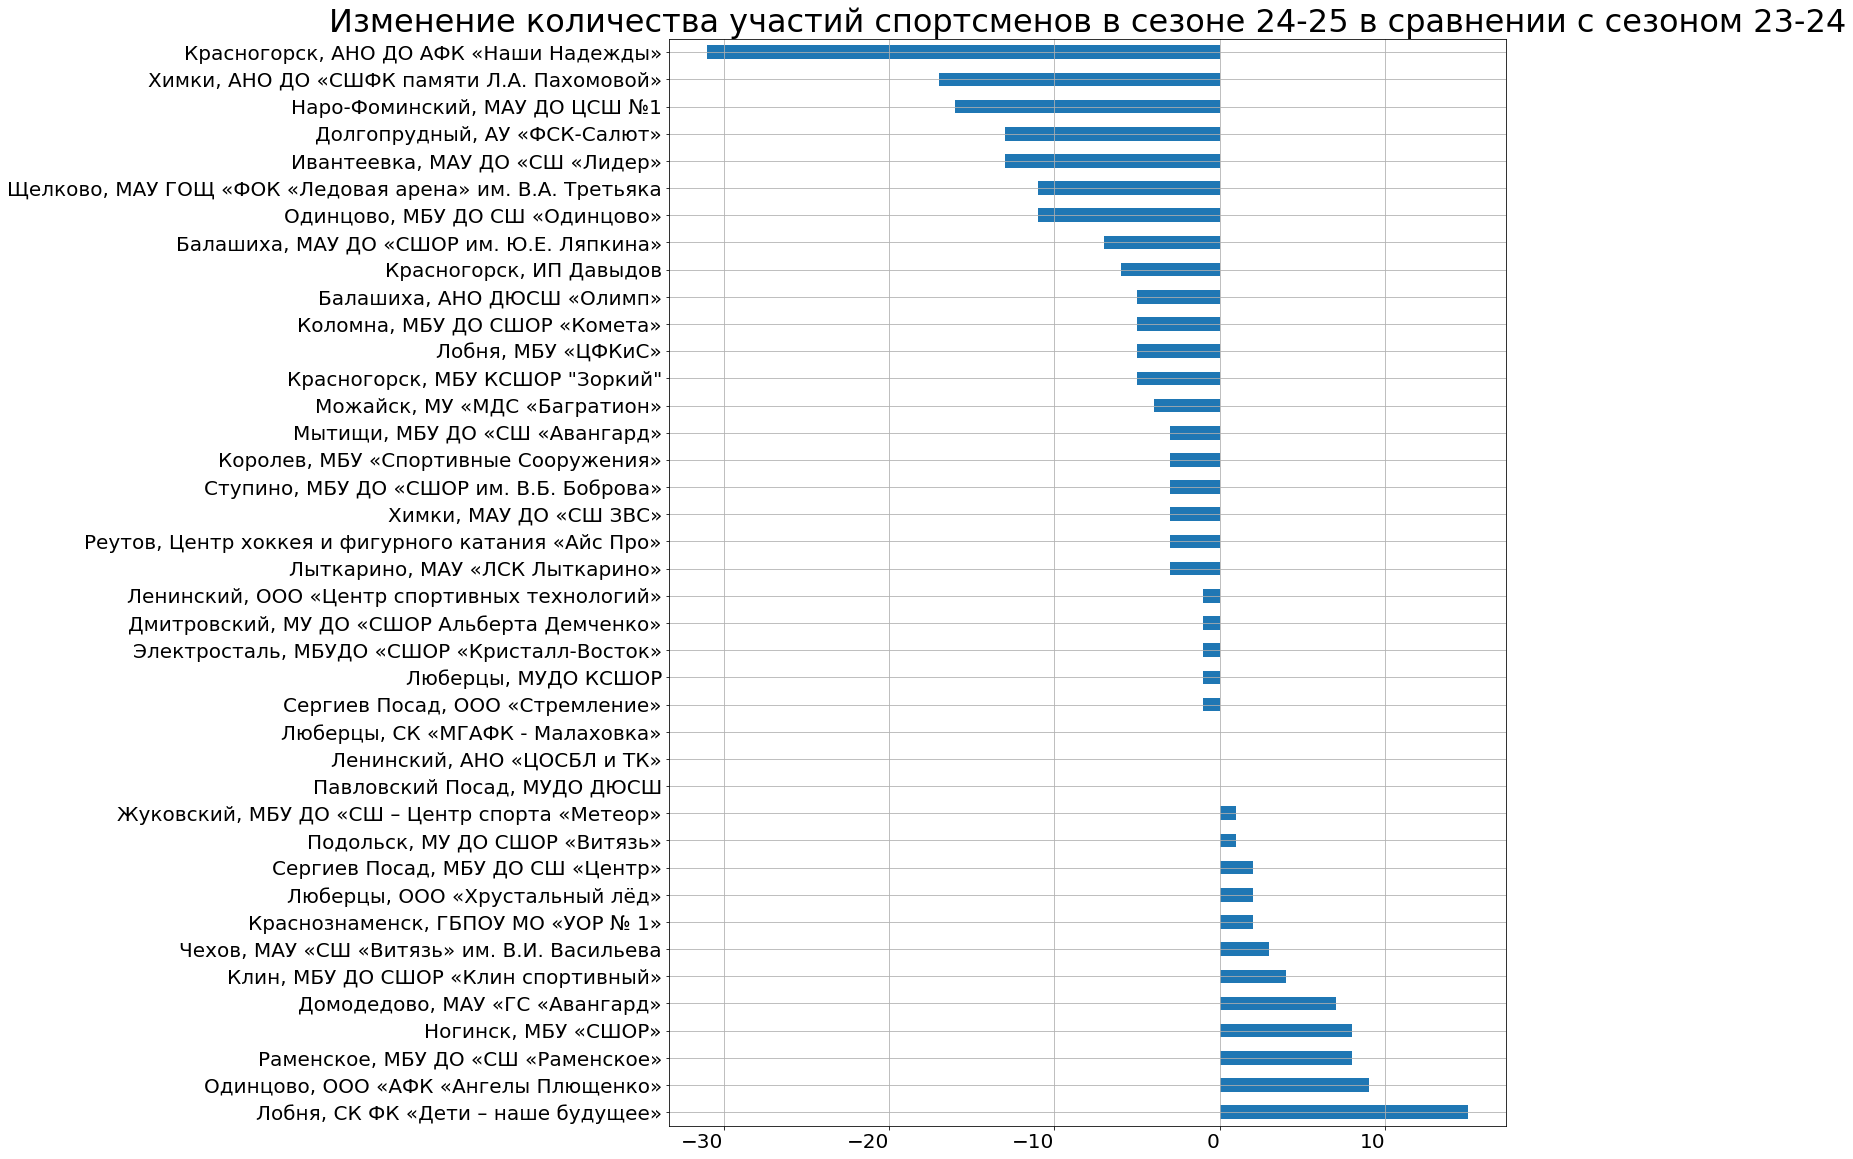

In [27]:
sportsmens_qty_trend(2324, 2425)

In [28]:
sportsmens_qty_trend(2324, 2425, plot=False).sum()

-110.0

<Axes: >

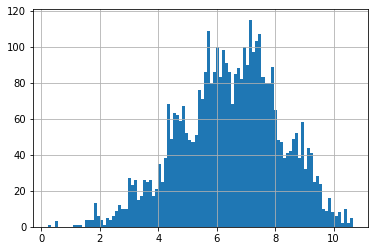

In [29]:
df[(df['category'] == '3-й юношеский разряд, девочки')]['tes'].hist(bins=100)

In [30]:
ffkkmo_ra.sorter_names

[('3-й юношеский разряд, мальчики', 'Произвольная программа', 5.5),
 ('3-й юношеский разряд, девочки', 'Произвольная программа', 5.5),
 ('2-й юношеский разряд, мальчики', 'Произвольная программа', 9.5),
 ('2-й юношеский разряд, девочки', 'Произвольная программа', 9.5),
 ('1-й юношеский разряд, мальчики', 'Произвольная программа', 13),
 ('1-й юношеский разряд, девочки', 'Произвольная программа', 13),
 ('3-й спортивный разряд, мальчики', 'Произвольная программа', 16),
 ('3-й спортивный разряд, девочки', 'Произвольная программа', 16),
 ('2-й спортивный разряд, мальчики', 'Короткая программа', 13),
 ('2-й спортивный разряд, мальчики', 'Произвольная программа', 20),
 ('2-й спортивный разряд, девочки', 'Короткая программа', 13),
 ('2-й спортивный разряд, девочки', 'Произвольная программа', 20),
 ('1-й спортивный разряд, мальчики', 'Короткая программа', 19),
 ('1-й спортивный разряд, мальчики', 'Произвольная программа', 30),
 ('1-й спортивный разряд, девочки', 'Короткая программа', 19),
 ('1-

In [34]:
tes_min = dict(zip([(x[0], x[1]) for x in ffkkmo_ra.sorter_names], [(x[2]) for x in ffkkmo_ra.sorter_names]))

In [35]:
def calc_procentage(x):
    return len(list(filter(lambda y : y > avg(x[1]), x[0]))) / len(x[0]) * 100

In [69]:
for x in tes_min:
    df.loc[(df['category'] == x[0]) & (df['segment'] == x[1]), 'tes_min'] = tes_min[x]
df['tes_done'] = df['tes'] >= df['tes_min']

In [70]:
pvt = pd.pivot_table(
    df[], 
    values='tes_done', 
    index=['category', 'segment'], 
    columns='season', 
    aggfunc=lambda x : f"{sum(x) / len(x) * 100:.2f}%"
)
sorterIndex = dict(zip([(x[0], x[1]) for x in ffkkmo_ra.sorter_names], range(len(ffkkmo_ra.sorter_names))))
pvt['category_Rank'] = pvt.index.map(lambda x : sorterIndex[x])
pvt.sort_values('category_Rank', ascending = True, inplace = True)
pvt.drop('category_Rank', 1, inplace = True)
pvt[2425]

KeyError: ('КМС, юноши', 'Короткая программа')

In [40]:
pvt.index

MultiIndex([( '1-й спортивный разряд, девочки',     'Короткая программа'),
            ( '1-й спортивный разряд, девочки', 'Произвольная программа'),
            ('1-й спортивный разряд, мальчики',     'Короткая программа'),
            ('1-й спортивный разряд, мальчики', 'Произвольная программа'),
            (  '1-й юношеский разряд, девочки', 'Произвольная программа'),
            ( '1-й юношеский разряд, мальчики', 'Произвольная программа'),
            ( '2-й спортивный разряд, девочки',     'Короткая программа'),
            ( '2-й спортивный разряд, девочки', 'Произвольная программа'),
            ('2-й спортивный разряд, мальчики',     'Короткая программа'),
            ('2-й спортивный разряд, мальчики', 'Произвольная программа'),
            (  '2-й юношеский разряд, девочки', 'Произвольная программа'),
            ( '2-й юношеский разряд, мальчики', 'Произвольная программа'),
            (    '3 спopтиный рaзряд, девушки', 'Произвольная программа'),
            ( '3-й спорти

In [ ]:
pvt['2425'].plot(kind='barh')

In [ ]:
df['tes_pcs_ratio'] = df['tes']/df['pcs']

In [ ]:
df[(df['season'] == '2324')]['tes_pcs_ratio'].hist(bins=50, figsize=(15, 5), range=(0, 2))